# Coding Discussion 04
## Vince Egalla (ve68)

For this coding discussion, let's play around with some of the linear algebra concepts that we've covered in class. Specifically, let's return to our discussion of representing text as vectors and analyzing the angle between those vectors (which as we saw, offers a measure of similarity).

In the `Data/` folder, there are five separate news reports on Turkish President Erdogan addressing the murder of journalist Jamal Khashoggi in `.txt` files. Each contains the same story (relatively speaking) from different sources with different political leanings/interests. In addition to this, I also include `stop-words.csv` file containing common English words that we want to purge from our text (recall there are words that are common to all sentences, like "the" and "and", that we want to remove when comparing documents).

Use what we know about (a) reading in text files, (b) data manipulation, and (c) linear algebra to analyze the difference between these documents. Does each news site report on these stories in a similar way? Which news sites talk about the Khashoggi scandal in similar/dissimilar ways? If you change what words you remove, does the picture of similarity change?

This discussion is largely open. Probe the data however you see fit. The only restriction is that you must calculate the cosine similarity on your own. Don't rely on any canned functions that do this for you.


#### Dependencies

In [1]:
import pandas as pd
import numpy as np

#### Load Stop Words

In [2]:
## Read stop_words.csv into data frame
stop_words = pd.read_csv(r"C:\Georgetown\2020 Fall\PPOL 564\coding_discussions_ppol564_fall2020\04_coding_discussion\Data\stop_words.csv")

## Check on data frame
stop_words.head()

,word
0,a
1,a's
2,able
3,about
4,above


In [3]:
## Convert data frame to a list
stop_list = stop_words['word'].tolist()

In [4]:
## Check conversion
stop_list

['a',
 "a's",
 'able',
 'about',
 'above',
 'according',
 'accordingly',
 'across',
 'actually',
 'after',
 'afterwards',
 'again',
 'against',
 "ain't",
 'all',
 'allow',
 'allows',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'an',
 'and',
 'another',
 'any',
 'anybody',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anyways',
 'anywhere',
 'apart',
 'appear',
 'appreciate',
 'appropriate',
 'are',
 "aren't",
 'around',
 'as',
 'aside',
 'ask',
 'asking',
 'associated',
 'at',
 'available',
 'away',
 'awfully',
 'b',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'believe',
 'below',
 'beside',
 'besides',
 'best',
 'better',
 'between',
 'beyond',
 'both',
 'brief',
 'but',
 'by',
 'c',
 "c'mon",
 "c's",
 'came',
 'can',
 "can't",
 'cannot',
 'cant',
 'cause',
 'causes',
 'certain',
 'certainly',
 'changes',
 'clearly',
 'co',
 'com',
 'come',
 'c

In [5]:
def tokenize0(text):
    '''
    GOAL: Tokenize text object into list after removing punctuation and conversion to lower case
    INPUT: Text object
    OUTPUT: List of words from text object
    '''
    text = text.lower()
    text = text.replace('.','')
    text = text.replace('\\','')
    text = text.replace('-','')
    text = text.replace(',','')
    text = text.replace('\"','')
    text = text.replace('[','')
    text = text.replace(']"','')
    text = text.replace('?','')
    text = text.replace('\'','')
    text = text.replace('“','')
    text = text.replace('”','')
    text_list0 = text.split()
    return text_list0

In [6]:
def tokenize1(text):
    '''
    GOAL: Tokenize text object into list after removing punctuation, conversion to lower case,
            and removal of common words
    INPUT: Text object
    OUTPUT: List of words from text object
    '''
    text = text.lower()
    text = text.replace('.','')
    text = text.replace('\\','')
    text = text.replace('-','')
    text = text.replace(',','')
    text = text.replace('\"','')
    text = text.replace('[','')
    text = text.replace(']"','')
    text = text.replace('?','')
    text = text.replace('\'','')
    text = text.replace('“','')
    text = text.replace('”','')
    text_list0 = text.split()
    text_list1 = [i for i in text_list0 if i not in stop_list]
    return text_list1

In [7]:
def generateDTM(filenames= None, token= 0):
    '''
    GOAL: Create document text matrix from a list of files
    INPUT: List of filenames of text objects
    OUTPUT: Pandas data frame of document text matrix
    '''
    ## Create empty data frame
    DTM = pd.DataFrame()
    ## Loop through each filename
    for filename in filenames:
        ## Open file and store in memory
        with open("C:\\Georgetown\\2020 Fall\\PPOL 564\\coding_discussions_ppol564_fall2020\\04_coding_discussion\\Data\\"+filename+".txt",encoding="utf-8") as f: 
            content = f.read()
        ## Tokenize text
        if token == 0:
            content_list = tokenize0(content)
        elif token == 1:
            content_list = tokenize1(content)
        ## Convert to dictionary with count of words
        content_dict = dict()
        for word in content_list:
            if word in content_dict:
                content_dict[word][0] += 1
            else:
                content_dict[word] = [1]
        ## Append filename's DTM to cumulative DTM
        DTM = DTM.append(pd.DataFrame(content_dict), ignore_index= True, sort= True)
    ## Replace null values with 0 if specific words are not found in a text
    DTM.fillna(0, inplace= True)    
    return DTM

In [8]:
## List of filenames
files = ["aljazeera-khashoggi","bbc-khashoggi","breitbart-khashoggi","cnn-khashoggi","fox-khashoggi"]

In [9]:
## Generate document text matrix from all files
khashoggiDTM0 = generateDTM(files, 0)
khashoggiDTM0

,$50bn,(2r),(90kilometer),(ak,(cnn),(l),(r),(£385bn),1,11,...,working,world,worse,would,writer,yalova,yelova,yet,your,—
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,3.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,2.0,2.0,0.0,1.0,0.0,0.0,3.0


In [10]:
## List for conversion to print statements
indexFilename = [[0,"Aljazeera"],[1,"BBC"],[2,"Breitbart"],[3,"CNN"],[4,"Fox"]]

In [11]:
## Create empty list to add values to
similarityData0 = []

## Loop through permutations of indices
for i in range(0,5):
    for j in range(0,5):
        if i != j:
            a = khashoggiDTM0.iloc[i]
            b = khashoggiDTM0.iloc[j]
            cosine = a.dot(b)/(np.sqrt(a.dot(a))*np.sqrt(b.dot(b)))
            print("The cosine similarity between the articles from "+indexFilename[i][1]+" and "+indexFilename[j][1]+" is "+str(round(cosine,3)) + ".")
            similarityData0.append([indexFilename[i][1],indexFilename[j][1],cosine])
        elif i == j:
            similarityData0.append([indexFilename[i][1],indexFilename[j][1],0])

The cosine similarity between the articles from Aljazeera and BBC is 0.872.
The cosine similarity between the articles from Aljazeera and Breitbart is 0.837.
The cosine similarity between the articles from Aljazeera and CNN is 0.735.
The cosine similarity between the articles from Aljazeera and Fox is 0.842.
The cosine similarity between the articles from BBC and Aljazeera is 0.872.
The cosine similarity between the articles from BBC and Breitbart is 0.897.
The cosine similarity between the articles from BBC and CNN is 0.744.
The cosine similarity between the articles from BBC and Fox is 0.887.
The cosine similarity between the articles from Breitbart and Aljazeera is 0.837.
The cosine similarity between the articles from Breitbart and BBC is 0.897.
The cosine similarity between the articles from Breitbart and CNN is 0.679.
The cosine similarity between the articles from Breitbart and Fox is 0.867.
The cosine similarity between the articles from CNN and Aljazeera is 0.735.
The cosine s

In [12]:
## Convert to data frame for visualization
similarityDF0 = pd.DataFrame(similarityData0).rename(columns={0:'source1',1:'source2',2:'cosine_similarity'})

In [13]:
## Resort by cosine similarity
similarityDF0.sort_values(by= 'cosine_similarity')

,source1,source2,cosine_similarity
0,Aljazeera,Aljazeera,0.000000
18,CNN,CNN,0.000000
6,BBC,BBC,0.000000
12,Breitbart,Breitbart,0.000000
24,Fox,Fox,0.000000
17,CNN,Breitbart,0.678944
13,Breitbart,CNN,0.678944
3,Aljazeera,CNN,0.735454
15,CNN,Aljazeera,0.735454
19,CNN,Fox,0.736611


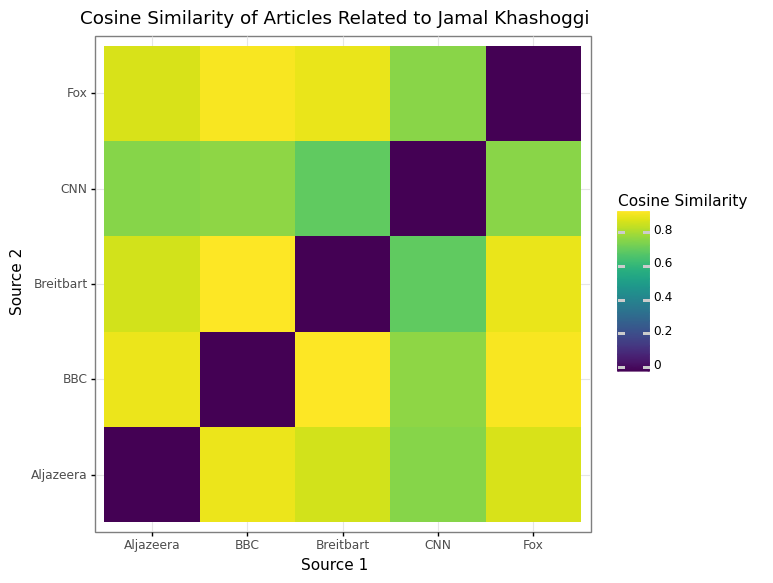

<ggplot: (124738951894)>

In [14]:
from plotnine import *
(
    ggplot(similarityDF0, aes(x= 'source1', y= 'source2', fill= 'cosine_similarity')) +
        geom_tile() +
        labs(x= "Source 1", y= "Source 2", fill= "Cosine Similarity", title= "Cosine Similarity of Articles Related to Jamal Khashoggi") +
        theme_bw() +
        coord_equal()
)

In [15]:
## Generate document text matrix from all files after removing common words
khashoggiDTM1 = generateDTM(files, 1)
khashoggiDTM1

,$50bn,(2r),(90kilometer),(ak,(cnn),(l),(r),(£385bn),1,11,...,white,widely,withheld,woods,world,worse,writer,yalova,yelova,—
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,2.0,0.0,1.0,3.0


In [17]:
## Create empty list to add values to
similarityData1 = []

## Loop through permutations of indices
for i in range(0,5):
    for j in range(0,5):
        if i != j:
            a = khashoggiDTM1.iloc[i]
            b = khashoggiDTM1.iloc[j]
            cosine = a.dot(b)/(np.sqrt(a.dot(a))*np.sqrt(b.dot(b)))
            print("The cosine similarity between the articles from "+indexFilename[i][1]+" and "+indexFilename[j][1]+" is "+str(round(cosine,3)) + ".")
            similarityData1.append([indexFilename[i][1],indexFilename[j][1],cosine])
        elif i == j:
            similarityData1.append([indexFilename[i][1],indexFilename[j][1],0])
            
## Convert to data frame for visualization
similarityDF1 = pd.DataFrame(similarityData1).rename(columns={0:'source1',1:'source2',2:'cosine_similarity'})

The cosine similarity between the articles from Aljazeera and BBC is 0.68.
The cosine similarity between the articles from Aljazeera and Breitbart is 0.582.
The cosine similarity between the articles from Aljazeera and CNN is 0.535.
The cosine similarity between the articles from Aljazeera and Fox is 0.679.
The cosine similarity between the articles from BBC and Aljazeera is 0.68.
The cosine similarity between the articles from BBC and Breitbart is 0.581.
The cosine similarity between the articles from BBC and CNN is 0.502.
The cosine similarity between the articles from BBC and Fox is 0.627.
The cosine similarity between the articles from Breitbart and Aljazeera is 0.582.
The cosine similarity between the articles from Breitbart and BBC is 0.581.
The cosine similarity between the articles from Breitbart and CNN is 0.367.
The cosine similarity between the articles from Breitbart and Fox is 0.547.
The cosine similarity between the articles from CNN and Aljazeera is 0.535.
The cosine sim

In [18]:
## Resort by cosine similarity
similarityDF1.sort_values(by= 'cosine_similarity')

,source1,source2,cosine_similarity
0,Aljazeera,Aljazeera,0.000000
18,CNN,CNN,0.000000
6,BBC,BBC,0.000000
12,Breitbart,Breitbart,0.000000
24,Fox,Fox,0.000000
17,CNN,Breitbart,0.367165
13,Breitbart,CNN,0.367165
8,BBC,CNN,0.502156
16,CNN,BBC,0.502156
19,CNN,Fox,0.517322


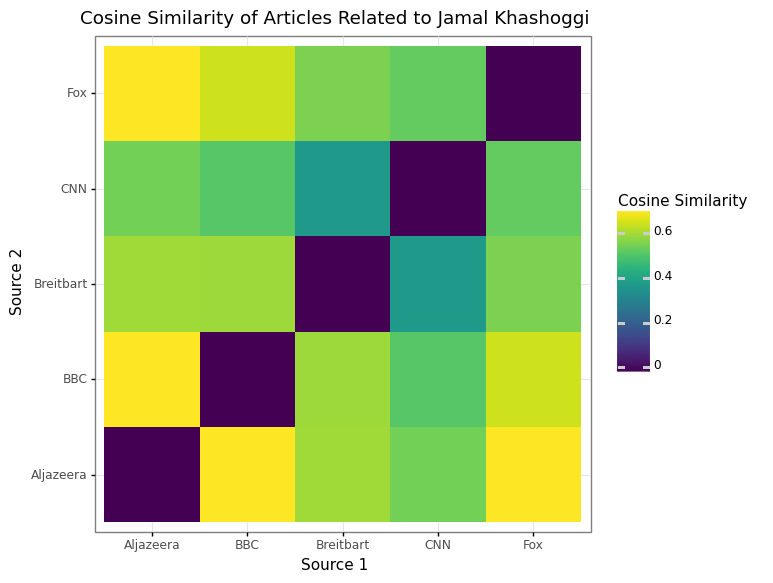

<ggplot: (124741503133)>

In [19]:
from plotnine import *
(
    ggplot(similarityDF1, aes(x= 'source1', y= 'source2', fill= 'cosine_similarity')) +
        geom_tile() +
        labs(x= "Source 1", y= "Source 2", fill= "Cosine Similarity", title= "Cosine Similarity of Articles Related to Jamal Khashoggi") +
        theme_bw() +
        coord_equal()
)

#### Discussion

Each news site reports in a similar way initially with cosine similarities ranging from .68 to .90 when the scale is from 0 to 1. From the visualization Fox seems to be the most similar to other news sources. After removing common words, the similarity decreases across the board with values now ranging from 0.37 to 0.68. The maximum cosine simularity is now the minimum of the previous version. Given the values of each news source, it is difficult to pinpoint which one is the most similar to other sources; however CNN appears to be the most original in reporting.